In [1]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 데이터 로드

iris = load_iris()

In [3]:
X = iris.data[:, :2]                     # 앞의 2 피쳐만 사용(시각화 위해!)
y = (iris.target==0).astype(int)         # 붓꽃 품종 1개 vs 나머지

In [4]:
# 모델 학습

model = LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [5]:
# 시각화용 격자 생성 코드 (모델링에서 현재 시점 중요하지 않음!)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5       # x축 만들어 주는 코드
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5       # y축 만들어 주는 코드
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),        # np.meshgrid<<< 격자 그리는 함수 200X200
                     np.linspace(y_min, y_max, 200))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])            # 모델이 예측한 클래스 라벨 계산
Z = Z.reshape(xx.shape)                                     # Z를 격자 형태로 변형 -> 2D

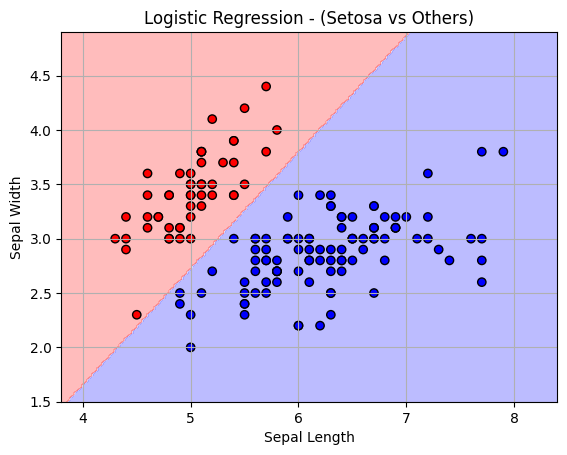

In [8]:
# 시각화

plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')                       # 등고선 완료
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', edgecolors='black')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title("Logistic Regression - (Setosa vs Others)")
plt.grid(True)
plt.show()

## 2. Iris 데이터로 다중분류

In [9]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# 데이터 로드
iris = load_iris()

In [11]:
X = iris.data[:, :2]                  # 앞 2개만 사용(시각화 위해!)
y = iris.target
class_names = iris.target_names       # Iris데이터의 각 클래스 이름을 가져옴

In [19]:
# 시각화용 격자 생성 코드 (모델링에서 현재 시점 중요하지 않음!)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5       # x축 만들어 주는 코드
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5       # y축 만들어 주는 코드
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),        # np.meshgrid<<< 격자 그리는 함수 200X200
                     np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

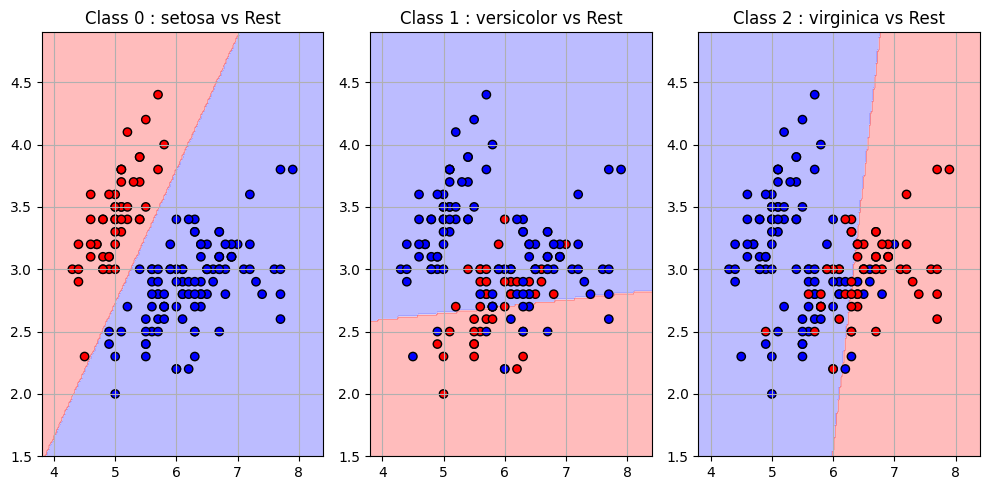

In [23]:
# 모델링 & 시각화

plt.figure(figsize=(10,5))

for i in range(3):
    binary_y = (y==i).astype(int)
    model = LogisticRegression()
    model.fit(X, binary_y)

    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.subplot(1, 3, i+1)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    plt.scatter(X[:,0], X[:,1], c=binary_y, cmap='bwr', edgecolors='black')
    plt.title(f'Class {i} : {class_names [i]} vs Rest')
    plt.grid(True)

plt.tight_layout()
plt.show()

## 3. Softmax 이용한 이진분류

In [24]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

In [25]:
# 데이터 로드
iris = load_iris()

In [26]:
X = iris.data[:, :2]                  # 앞 2개만 사용(시각화 위해!)
y = iris.target
class_names = iris.target_names       # Iris데이터의 각 클래스 이름을 가져옴

In [27]:
# Softmax 회귀 모델링

model = LogisticRegression(multi_class='multinomial', solver='lbfgs')  #multi_class='multinomial', solver='lbfgs' : 소프트맥스
model.fit(X, y)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [29]:
# 시각화용 격자 생성 코드 (모델링에서 현재 시점 중요하지 않음!)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5       # x축 만들어 주는 코드
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5       # y축 만들어 주는 코드
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),        # np.meshgrid<<< 격자 그리는 함수 200X200
                     np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

In [32]:
# 예측값

Z = model.predict(grid)
Z = Z.reshape(xx.shape)

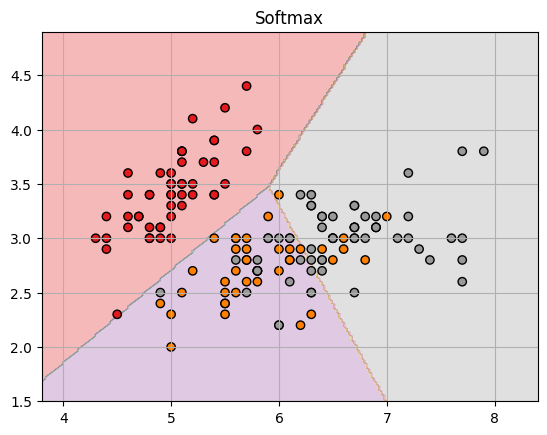

In [41]:
# 시각화

plt.contourf(xx, yy, Z, alpha=0.3, cmap='Set1')
scatter = plt.scatter(X[:, 0], X[:,1], c=y, cmap='Set1', edgecolors='black')
plt.title('Softmax')
# plt.legend(handles=scatter, scatter.legend_elements()[0], labels=class_names)
plt.grid(True)
plt.show()